In [1]:
from qiskit import * # import tudo do qiskit

In [2]:
# Determina o número de qubits e de cbits a serem utilizados
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

# Constrói o circuito quântico
qc = QuantumCircuit(qr, cr)

In [3]:
# para o circuitos quânticos ficarem mais apresentáveis
%matplotlib inline 

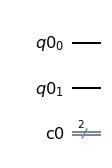

In [4]:
# desenha o circuito quântico
qc.draw(output = 'mpl')

In [5]:
# adiciona a porta lógica de Hadamard ao circuito, aplicada no qubit (registro quântico) 0
qc.h(qr[0]); # tem que usar ; pra não dar aviso

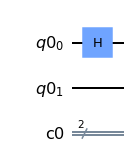

In [10]:
qc.draw(output = 'mpl') # o output = 'mpl' é para a figura ficar mais apresentável

In [11]:
# adiciona uma controll-not ao circuito, com o controle sendo qr[0] e o target sendo qr[1]
qc.cx(qr[0],qr[1]);

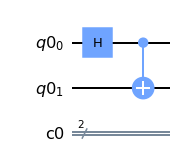

In [12]:
# é importante sempre mandar mostrar o circuito, pra ter certeza que é realmente o que queremos construir
qc.draw(output = 'mpl')

In [13]:
# adiciona medidas em todos os qubits (a ser usada quando queremos acessar a distribuições de probabilidades)
qc.measure(qr,cr);

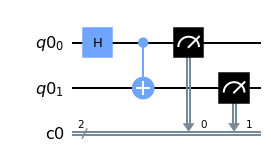

In [14]:
qc.draw(output = 'mpl')

In [15]:
# Determina o backend a ser usando, que poder ser um simulador ou um chip real
# Neste caso escolhemos o simulador qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

In [16]:
# número de medidas para estimativa de uma distribuição de probabilidades
nshots = 8192

In [57]:
# executa o circuito qc no backend escolhido
result = execute(qc, backend = simulator, shots = nshots).result()

In [19]:
# para visualizar o histograma da distribuição de probabilidades
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(qc))

AttributeError: module 'qiskit.result' has no attribute 'get_counts'

In [85]:
#provider = IBMQ.get_provider('ibm-q')
provider = IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')

In [86]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-research-2', group='federal-uni-sant-1', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q-research-2', group='federal-uni-sant-1', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q-research-2', group='federal-uni-sant-1', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-research-2', group='federal-uni-sant-1', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q-research-2', group='federal-uni-sant-1', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q-research-2', group='federal-uni-sant-1', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-research-2', group='federal-uni-sant-1', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-research-2', group='federal-uni-sant-1', project='main')>,
 <IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-research-2', group='federal-uni-sant-1', project='main')>,
 <IB

In [87]:
#qcomp = provider.get_backend('ibmq_16_melbourne')
qcomp = provider.get_backend('ibmq_belem')

In [88]:
qcomp.name()

'ibmq_belem'

In [80]:
job = execute(circuit, backend = qcomp, shots = nshots)

In [81]:
from qiskit.tools.monitor import job_monitor

In [82]:
job_monitor(job)

Job Status: job has successfully run


In [83]:
result = job.result()

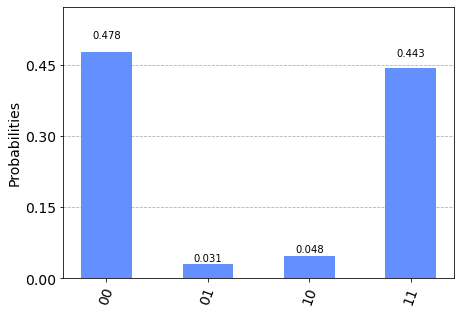

In [84]:
plot_histogram(result.get_counts(circuit))